In [1]:
ENV["GKS_ENCODING"] = "utf-8"
include("src/ladderDGA_Julia.jl");

Inputs Read. Starting Computation                                          
Calculating bubble:   4.691180 seconds (8.66 M allocations: 439.098 MiB, 11.65% gc time)
Calculating χ and γ in the charge channel:  65.071511 seconds (98.82 M allocations: 28.874 GiB, 9.87% gc time)


LoadError: UndefVarError: χsp not defined

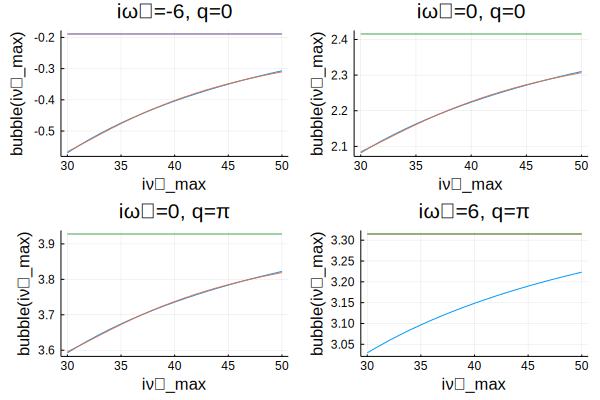

In [2]:
include("src/GFFit.jl")
start = 30
sum_bubble, tail_bubble = fit_F_sum(bubble, start, modelParams, simParams, 2);
limit = approx_full_sum(bubble, start, modelParams, simParams, 2);
n_iν = size(bubble,2)
x = iν_array(modelParams.β, n_iν)[start:end]
fitted_bubble1 = real(tail_func_cmplx(x, tail_bubble[1,1,:]));
fitted_bubble2 = real(tail_func_cmplx(x, tail_bubble[6,1,:]));
fitted_bubble3 = real(tail_func_cmplx(x, tail_bubble[6,end,:]));
f1 = Plots.plot(start:n_iν, real(sum_bubble[1,1,:]), title="iωₙ=-6, q=0", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f1 = Plots.plot!(start:n_iν, fitted_bubble1)
f1 = Plots.plot!(start:n_iν, repeat([tail_bubble[1,1,1]], length(start:n_iν)))
f1 = Plots.plot!(start:n_iν, repeat([real(limit[1,1,1])], length(start:n_iν)))
f2 = Plots.plot(start:n_iν, real(sum_bubble[6,1,:]), title="iωₙ=0, q=0", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f2 = Plots.plot!(start:n_iν, fitted_bubble2)
f2 = Plots.plot!(start:n_iν, repeat([tail_bubble[6,1,1]], length(start:n_iν)))
f3 = Plots.plot(start:n_iν, real(sum_bubble[6,end,:]), title="iωₙ=0, q=π", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f3 = Plots.plot!(start:n_iν, fitted_bubble3)
f3 = Plots.plot!(start:n_iν, repeat([tail_bubble[6,end,1]], length(start:n_iν)))
f4 = Plots.plot(start:n_iν, real(sum_bubble[end,end,:]), title="iωₙ=6, q=π", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f4 = Plots.plot!(start:n_iν, real(tail_func_full(x, tail_bubble[end,end,:])))
f4 = Plots.plot!(start:n_iν, repeat([tail_bubble[end,end,1]], length(start:n_iν)))
f = plot(f1,f2,f3,f4,layout=(2,2),legend=:none)
display(f)

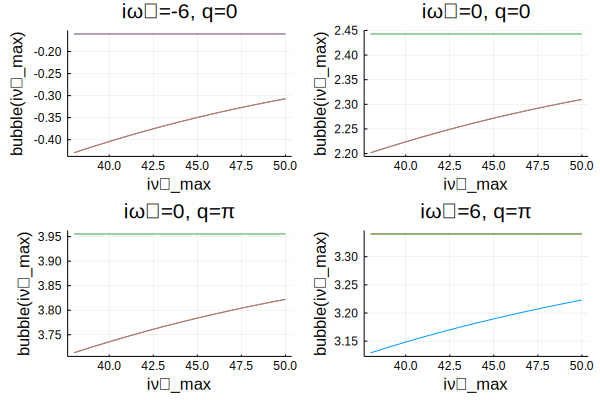

In [3]:
start = 38
sum_bubble, tail_bubble = fit_F_sum(bubble, start, modelParams, simParams, 2);
limit = approx_full_sum(bubble, start, modelParams, simParams, 2);
n_iν = size(bubble,2)
x = iν_array(modelParams.β, n_iν)[start:end]
fitted_bubble1 = real(tail_func_cmplx(x, tail_bubble[1,1,:]));
fitted_bubble2 = real(tail_func_cmplx(x, tail_bubble[6,1,:]));
fitted_bubble3 = real(tail_func_cmplx(x, tail_bubble[6,end,:]));
f1 = Plots.plot(start:n_iν, real(sum_bubble[1,1,:]), title="iωₙ=-6, q=0", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f1 = Plots.plot!(start:n_iν, fitted_bubble1)
f1 = Plots.plot!(start:n_iν, repeat([tail_bubble[1,1,1]], length(start:n_iν)))
f1 = Plots.plot!(start:n_iν, repeat([real(limit[1,1,1])], length(start:n_iν)))
f2 = Plots.plot(start:n_iν, real(sum_bubble[6,1,:]), title="iωₙ=0, q=0", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f2 = Plots.plot!(start:n_iν, fitted_bubble2)
f2 = Plots.plot!(start:n_iν, repeat([tail_bubble[6,1,1]], length(start:n_iν)))
f3 = Plots.plot(start:n_iν, real(sum_bubble[6,end,:]), title="iωₙ=0, q=π", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f3 = Plots.plot!(start:n_iν, fitted_bubble3)
f3 = Plots.plot!(start:n_iν, repeat([tail_bubble[6,end,1]], length(start:n_iν)))
f4 = Plots.plot(start:n_iν, real(sum_bubble[end,end,:]), title="iωₙ=6, q=π", ylabel="bubble(iνₙ_max)", xlabel="iνₙ_max")
f4 = Plots.plot!(start:n_iν, real(tail_func_full(x, tail_bubble[end,end,:])))
f4 = Plots.plot!(start:n_iν, repeat([tail_bubble[end,end,1]], length(start:n_iν)))
f = plot(f1,f2,f3,f4,layout=(2,2),legend=:none)
display(f)

In [4]:
size(bubble)

(13, 50, 36)

In [67]:
start = 42
limit = zeros((size(bubble,1),size(bubble,3),size(bubble,2)-1))
limit2 = zeros((size(bubble,1),size(bubble,3),size(bubble,2)-1))
for start in 1:49
    limit[:,:,start] = real.(approx_full_sum(bubble, start, modelParams, simParams, 2, tail_func_cmplx, 6));
    limit2[:,:,start] = approx_full_sum(bubble, start, modelParams, simParams, 2, tail_func_full, 3);
end
print(size(real(limit[1,1,:])))
f1 = Plots.plot(1:size(bubble,2)-1, real.(limit[1,1,:]), title="iωₙ=-6, q=0", ylabel="Σₙ bubble(q,iωₙ,iνₙ)", xlabel="start", label="complex coeffs")
f1 = Plots.plot!(1:size(bubble,2)-1, real.(limit2[1,1,:]), label="real coeffs")
f2 = Plots.plot(1:size(bubble,2)-1, real.(limit[6,1,:]), title="iωₙ=0, q=0", ylabel="Σₙ bubble(q,iωₙ,iνₙ)", xlabel="start", label="complex coeffs")
f2 = Plots.plot!(1:size(bubble,2)-1, real.(limit2[6,1,:]), label="real coeffs")
f3 = Plots.plot(1:size(bubble,2)-1, real.(limit[6,end,:]), title="iωₙ=0, q=π", ylabel="Σₙ bubble(q,iωₙ,iνₙ)", xlabel="start", label="complex coeffs")
f3 = Plots.plot!(1:size(bubble,2)-1, real.(limit2[6,end,:]), label="real coeffs")
f4 = Plots.plot(1:size(bubble,2)-1, real.(limit[end,end,:]), title="iωₙ=6, q=π", ylabel="Σₙ bubble(q,iωₙ,iνₙ)", xlabel="start", label="complex coeffs")
f4 = Plots.plot!(1:size(bubble,2)-1, real.(limit2[end,end,:]), label="real coeffs")
f = plot(f1,f2,f3,f4,layout=(2,2))
display(f)

MethodError: MethodError: no method matching approx_full_sum(::Array{Complex{Float64},3}, ::Int64, ::ModelParameters, ::SimulationParameters, ::Int64, ::typeof(tail_func_cmplx), ::Int64)
Closest candidates are:
  approx_full_sum(::Any, ::Any, ::Any, ::Any, ::Any; ω_shift, tail_func, n_tail) at /home/julian/Hamburg/ladderDGA_Julia/src/GFFit.jl:49

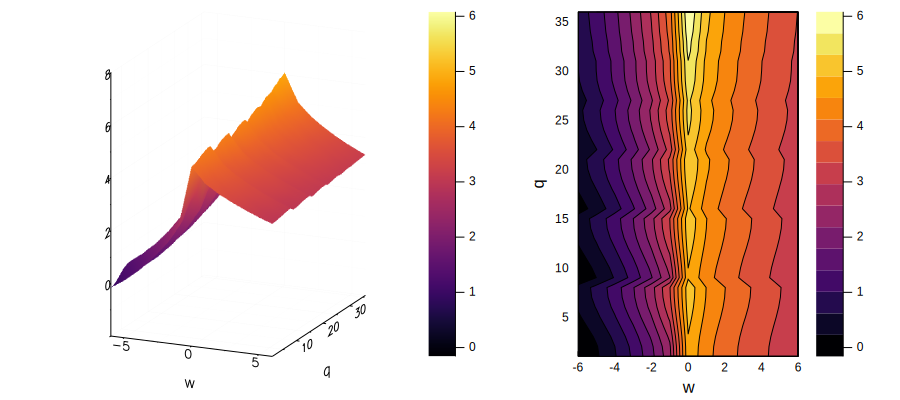

In [6]:
l = @layout [a{0.6w} b]
wbox = Int((size(tail_bubble,1)-1)/2)
plot((-wbox):wbox, 1:size(tail_bubble,2), (x,y) -> tail_bubble[x+wbox+1,y,1], st = [:surface, :contourf], layout=l, xlabel="w", ylabel="q", size=(900,400))

## Test for symmetry of the approximated tails.

Check for $\nu_n + \omega_n$ shift

Try to correct symmetry in $\omega_n$ by fitting to $\nu_n + \omega_n$ instead of $\nu_n$
    
The breakdown of the symmetry is indroduced by a shift in the center of the function. This leads to the tail being falling off more (or less) i ncertain regions of the parameter space.

In [71]:
include("src/GFFit.jl")
start = 75
arr_ch = χDMFTch[:,1:end,1:end]
arr_sp = χDMFTsp[:,1:end,1:end]

sum_χch = zeros(Complex{Float64},(length((-wbox):wbox),size(arr_ch,2)-start+1))
tail_χch = zeros((length((-wbox):wbox),8))
sum_χch2 = zeros(Complex{Float64},(length((-wbox):wbox),size(arr_ch,2)-start+1))
tail_χch2 = zeros((length((-wbox):wbox),4))

for (ωi,ωn) in enumerate((-wbox):wbox)
    sum_χch[ωi,:], tail_χch[ωi,:] = fit_F_sum(arr_ch[ωi,:,:], start, modelParams, simParams, [1,2], ω_shift=ωn,tail_func=tail_func_cmplx, n_tail=8);
    sum_χch2[ωi,:], tail_χch2[ωi,:] = fit_F_sum(arr_ch[ωi,:,:], start, modelParams, simParams, [1,2], ω_shift=ωn, tail_func=tail_func_full, n_tail=4);
end

sum_χch_noshift, tail_χch_noshift = fit_F_sum(arr_ch, start, modelParams, simParams, [2,3], ω_shift=0,tail_func=tail_func_cmplx, n_tail=8);
sum_χch2_noshift, tail_χch2_noshift = fit_F_sum(arr_ch, start, modelParams, simParams, [2,3], ω_shift=0, tail_func=tail_func_full, n_tail=4);

sum_χsp, tail_χsp = fit_F_sum(arr_sp, start, modelParams, simParams, [2,3], ω_shift=0, tail_func=tail_func_cmplx, n_tail=8);
n_iν2 = size(arr_ch,2)
x = iν_array(modelParams.β, n_iν2)[start:end];#χDMFTch

## Plot for sums over $\nu_n$ at different $\omega_n$

Here one can observe the behavior leading to the bias in the tails.

(1, 113)


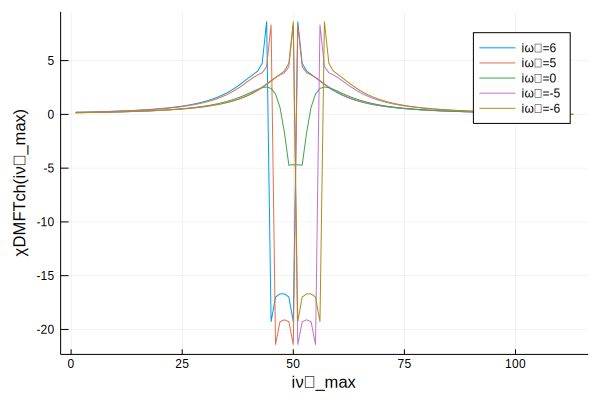

In [72]:
arr_ch_new = zeros(Complex{Float64}, 20,113,113);
for w in 1:size(arr_ch,1)
    arr_ch_new[w, collect(1:100), collect(1:100)] = arr_ch[w,:,:]
end
#.+ (Int(floor(w/2)))
#.+ (Int(floor(w/2)))
println(size(sum(arr_ch_new[w+7,:,:],dims=[1])))
w = 6
Plots.plot(collect(1:113),real.(sum(arr_ch_new[w+7,:,:],dims=[2])[:,1]), label="iωₙ=6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = 5
Plots.plot!(collect(1:113),real.(sum(arr_ch_new[w+7,:,:],dims=[2])[:,1]), label="iωₙ=5", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = 0
Plots.plot!(collect(1:113),real.(sum(arr_ch_new[w+7,:,:],dims=[2])[:,1]), label="iωₙ=0", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = -5
Plots.plot!(collect(1:113),real.(sum(arr_ch_new[w+7,:,:],dims=[2])[:,1]), label="iωₙ=-5", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = -6
Plots.plot!(collect(1:113),real.(sum(arr_ch_new[w+7,:,:],dims=[2])[:,1]), label="iωₙ=-6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")

## Plot of shifted sums

Shifting the x axis by $\omega_n$ centers the function.

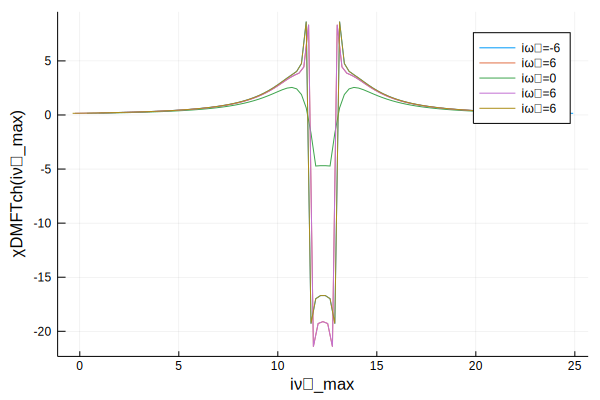

In [73]:
xaxis(wi) = π .* (2 .* collect(1:100) .+ 1 .+ wi)/26.1
w = 6
Plots.plot(xaxis(w), real.(sum(arr_ch[w+7,1:end,:],dims=[2])[:,1,1]), label="iωₙ=-6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = 5
Plots.plot!(xaxis(w), real.(sum(arr_ch[w+7,1:end,:],dims=[2])[:,1,1]), label="iωₙ=6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = 0
Plots.plot!(xaxis(w), real.(sum(arr_ch[w+7,1:end,:],dims=[2])[:,1,1]), label="iωₙ=0", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = -5
Plots.plot!(xaxis(w), real.(sum(arr_ch[w+7,1:end,:],dims=[2])[:,1,1]), label="iωₙ=6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
w = -6
Plots.plot!(xaxis(w), real.(sum(arr_ch[w+7,1:end,:],dims=[2])[:,1,1]), label="iωₙ=6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")


## Investigation of difference between Taylor and Laurent Series

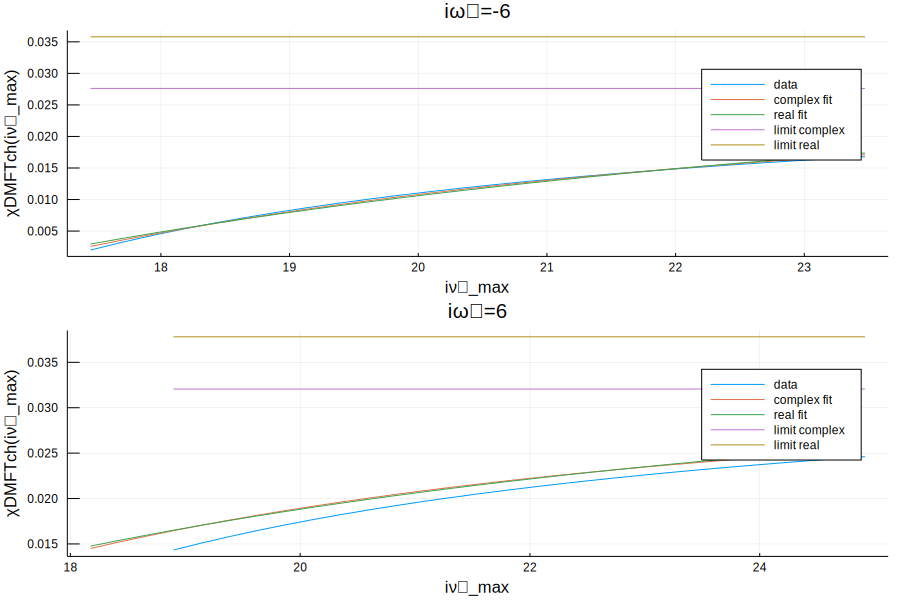

In [74]:
xaxis2(wi) = π .* (2 .* collect(start:n_iν2) .+ 1 .+ wi)/26.1
f21 = Plots.plot(xaxis2(-6), real(sum_χch[1,:]), title="iωₙ=-6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max", label="data")
f21 = Plots.plot!(xaxis2(-6), real(tail_func_cmplx(x, tail_χch[1,:])), label="complex fit")
f21 = Plots.plot!(xaxis2(-6), real(tail_func_full(x, tail_χch2[1,:])), label="real fit")
f21 = Plots.plot!(xaxis2(-6), repeat([tail_χch[1,1]], length(start:n_iν2)), label="limit complex")
f21 = Plots.plot!(xaxis2(-6), repeat([tail_χch2[1,1]], length(start:n_iν2)), label="limit real")
f22 = Plots.plot(xaxis2(0), real(sum_χch[6,:]), title="iωₙ=0", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max")
f22 = Plots.plot!(xaxis2(0), real(tail_func_cmplx(x, tail_χch[6,:])))
f22 = Plots.plot!(xaxis2(0), repeat([tail_χch[6,1]], length(start:n_iν2)))
f23 = Plots.plot(xaxis2(3), real(sum_χch[9,:]), title="iωₙ=3", ylabel="χDMFTch(iνₙ_max)", xlabel="iiνₙ_max")
f23 = Plots.plot!(xaxis2(3), real(tail_func_cmplx(x, tail_χch[9,:])))
f23 = Plots.plot!(xaxis2(3), repeat([tail_χch[9,1]], length(start:n_iν2)))
f24 = Plots.plot(xaxis2(6), real(sum_χch[12,:]), title="iωₙ=6", ylabel="χDMFTch(iνₙ_max)", xlabel="iνₙ_max", label="data")
f24 = Plots.plot!(xaxis2(0), real(tail_func_cmplx(x, tail_χch[12,:])), label="complex fit")
f24 = Plots.plot!(xaxis2(0), real(tail_func_full(x, tail_χch2[12,:])), label="real fit")
f24 = Plots.plot!(xaxis2(6), repeat([tail_χch[12,1]], length(start:n_iν2)), label="limit complex")
f24 = Plots.plot!(xaxis2(6), repeat([tail_χch2[12,1]], length(start:n_iν2)), label="limit real")
f = plot(f21,f24,layout=(2,1), size=(900,600))
display(f)

## Plot of $\chi_\text{DMFT}$ sum

Three different approximations for the sum over all Matsubara frequencies are shown:
    - naive sum (cut off at $\nu$)
    - fit to Taylor series
    - fit to Laurent series
    
Difference between right and left tail is plotted as a function of $\omega_n$

In [75]:
modelParams.β

26.1

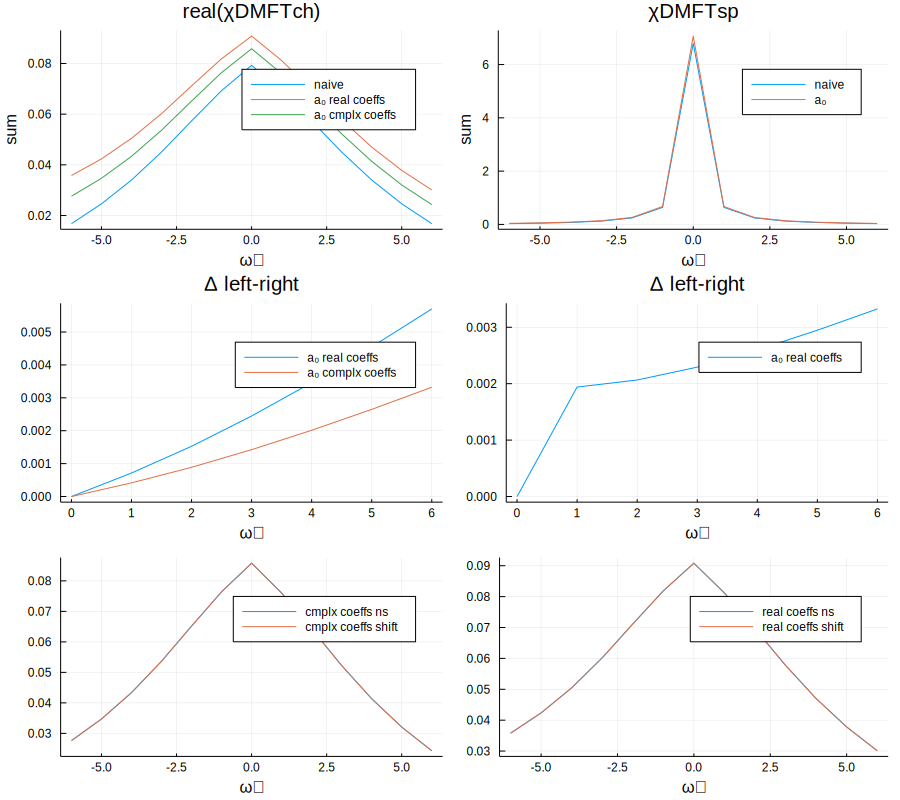

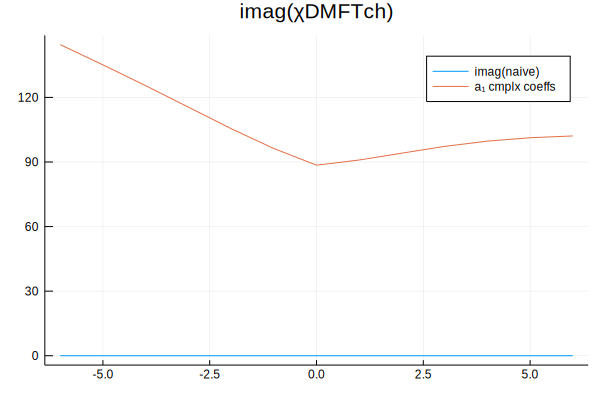

In [79]:
χDMFTch_sum = sum(χDMFTch[:,:,:]; dims=[2,3])[:,1,1]
χDMFTsp_sum = sum(χDMFTsp[:,:,:]; dims=[2,3])[:,1,1]
f1 = plot((-wbox):wbox, real(χDMFTch_sum)/(modelParams.β^2), xlabel="ωₙ", ylabel="sum", label="naive", title="real(χDMFTch)")
f1 = plot!((-wbox):wbox, tail_χch2[:,1], label="a₀ real coeffs")
f1 = plot!((-wbox):wbox, tail_χch[:,1], label="a₀ cmplx coeffs")
f2 = plot((-wbox):wbox, imag(χDMFTch_sum)/(modelParams.β^2), label="imag(naive)", title="imag(χDMFTch)")
f2 = plot!((-wbox):wbox, tail_χch[:,4], label="a₁ cmplx coeffs")
f3 = plot((-wbox):wbox, real(χDMFTsp_sum)/(modelParams.β^2), xlabel="ωₙ", ylabel="sum", label="naive", title="χDMFTsp")
plot!((-wbox):wbox, tail_χsp[:,1], label="a₀")
f4 = plot(0:wbox, abs.(tail_χch2[Int(ceil(size(tail_χch2,1)/2)):end,1].-reverse(tail_χch2[1:Int(ceil(size(tail_χch2,1)/2)),1])), xlabel="ωₙ", title="Δ left-right", label="a₀ real coeffs")
f4 = plot!(0:wbox, abs.(tail_χch[Int(ceil(size(tail_χch,1)/2)):end,1].-reverse(tail_χch[1:Int(ceil(size(tail_χch,1)/2)),1])), xlabel="ωₙ", title="Δ left-right", label="a₀ complx coeffs")
f5 = plot(0:wbox, abs.(tail_χsp[Int(ceil(size(tail_χsp,1)/2)):end,1].-reverse(tail_χsp[1:Int(ceil(size(tail_χsp,1)/2)),1])), xlabel="ωₙ", title="Δ left-right", label="a₀ real coeffs")
f6 = plot((-wbox):wbox, tail_χch_noshift[:,1], xlabel="ωₙ", label="cmplx coeffs ns")
f6 = plot!((-wbox):wbox, tail_χch[:,1], xlabel="ωₙ", label="cmplx coeffs shift")
f9 = plot((-wbox):wbox, tail_χch2_noshift[:,1], xlabel="ωₙ", label="real coeffs ns")
f9 = plot!((-wbox):wbox, tail_χch2[:,1], xlabel="ωₙ", label="real coeffs shift")
f7 = plot((-wbox):wbox, tail_χch2[:,1], xlabel="ωₙ", label="real coeffs shift")
f8 = plot((-wbox):wbox, tail_χch2[:,1], xlabel="ωₙ", label="real coeffs shift")
f = plot(f1,f3,
         f4,f5,
         f6,f9,
    layout=(3,2), size=(900,800))
display(f)

f(x) = x^2
f(3) == 9
df(3) == 6

display(f2)

In [77]:
start = 70
arr = -χch[:,1:end]

sum_χ, tail_χch = fit_F_sum(arr, start, modelParams, simParams, [2,3]);
n_iν2 = size(arr,2)
x = iν_array(modelParams.β, n_iν2)[start:end];#χDMFTch

BoundsError: BoundsError: attempt to access (13, 36)
  at index [3]

In [81]:
test = randn((100,100))

s = 0
function t1(f)
    for i in 1:100
        for j in 1:100
            s += f(i,j)
        end
    end
    return s
end

function t2(f)
    for i in 1:100
        for j in 1:100
            s += f(i,j)
        end
    end
    return s
end

t1 (generic function with 1 method)